# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from functools import reduce

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
number = 1
lat = []
temp = []
name = []
lng = []
humidity = []
cloudy = []
wind = []
country = []
date = []
town = []
#cities = ['London']

In [4]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #response.append(city_data)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        town.append(city)
    
        print(f"Processing Record {number} of Set {len(cities)} complete | Added{city}")
        number +=1
    except:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number += 1
    print("------------------------------\nData Retrieval Complete\n------------------------------")
    #print(results)

#print(json.dumps(response, indent=4, sort_keys=True))

Processing Record 1 of Set 624 complete | Addedvaini
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 2 of Set 624 complete | Addedkidal
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 3 of Set 624 complete | Addedrikitea
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 4 of Set 624 complete | Addedlavrentiya
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 5 of Set 624 complete | Addedhobart
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 6 of Set 624 complete | Addedhermanus
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 7 of Set 624 complete | Addedgrand gaube
------------------------------
Data Retrieval Complete
------------------------------
Processing

Processing Record 58 of Set 624 complete | Addedhasaki
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 59 of Set 624 complete | Addedsitka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 60 of Set 624 complete | Addedbarrow
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 61 of Set 624 complete | Addedgalesong
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 62 of 624. | Skipping illoqqortoormiut
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 63 of Set 624 complete | Addedkahului
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 64 of Set 624 complete | Addedaswan
------------------------------
Data Retrieval Complete
------------------------------


Processing Record 115 of Set 624 complete | Addedmataura
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 116 of 624. | Skipping toliary
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 117 of Set 624 complete | Addednaze
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 118 of Set 624 complete | Addedcabo san lucas
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 119 of Set 624 complete | Addedsistranda
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 120 of Set 624 complete | Addedte anau
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 121 of Set 624 complete | Addedtouros
------------------------------
Data Retrieval Complete
-----------------------

Processing Record 173 of Set 624 complete | Addedsibolga
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 174 of Set 624 complete | Addedthinadhoo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 175 of Set 624 complete | Addedowando
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 176 of Set 624 complete | Addedcodajas
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 177 of Set 624 complete | Addedkayerkan
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 178 of Set 624 complete | Addedsaint-denis
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 179 of 624. | Skipping grand river south east
------------------------------
Data Retrieval Complete
-------

Processing Record 230 of Set 624 complete | Addedmonte alegre de minas
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 231 of Set 624 complete | Addedmatsusaka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 232 of Set 624 complete | Addedmorros
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 233 of Set 624 complete | Addedpetropavlovsk-kamchatskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 234 of Set 624 complete | Addedtuktoyaktuk
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 235 of Set 624 complete | Addedhorsham
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 236 of Set 624 complete | Addeddaru
------------------------------
Data Retrieval Compl

Processing Record 288 of Set 624 complete | Addedlaguna
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 289 of Set 624 complete | Addedgikongoro
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 290 of 624. | Skipping lolua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 291 of Set 624 complete | Addedeast london
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 292 of Set 624 complete | Addedilo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 293 of Set 624 complete | Addedsao felix do xingu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 294 of Set 624 complete | Addeddicabisagan
------------------------------
Data Retrieval Complete
--------------

Processing Record 345 of Set 624 complete | Addedkosh-agach
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 346 of Set 624 complete | Addedsola
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 347 of Set 624 complete | Addedribeira grande
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 348 of Set 624 complete | Addedmeadow lake
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 349 of Set 624 complete | Addedpangnirtung
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 350 of Set 624 complete | Addedsaint-pierre
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 351 of Set 624 complete | Addedrussell
------------------------------
Data Retrieval Complete
----------

Processing Record 402 of Set 624 complete | Addedmahajanga
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 403 of Set 624 complete | Addedconde
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 404 of Set 624 complete | Addedseoul
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 405 of Set 624 complete | Addedtiksi
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 406 of Set 624 complete | Addedpuerto madryn
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 407 of 624. | Skipping houlung
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 408 of Set 624 complete | Addedmorgan city
------------------------------
Data Retrieval Complete
----------------------

Processing Record 460 of Set 624 complete | Addedyar-sale
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 461 of Set 624 complete | Addedkoplik
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 462 of Set 624 complete | Addedzambezi
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 463 of Set 624 complete | Addedpayson
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 464 of Set 624 complete | Addednangong
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 465 of Set 624 complete | Addedpudozh
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 466 of Set 624 complete | Addedmusoma
------------------------------
Data Retrieval Complete
------------------------------
Pr

Processing Record 517 of Set 624 complete | Addedmitsamiouli
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 518 of Set 624 complete | Addedca mau
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 519 of Set 624 complete | Addeddoha
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 520 of Set 624 complete | Addedkarratha
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 521 of Set 624 complete | Addednantucket
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 522 of Set 624 complete | Addedgualeguaychu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 523 of Set 624 complete | Addedla plaine
------------------------------
Data Retrieval Complete
--------------------

Processing Record 574 of Set 624 complete | Addedsantiago
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 575 of Set 624 complete | Addeddajal
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 576 of Set 624 complete | Addeditai
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 577 of Set 624 complete | Addedcasas grandes
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 578 of 624. | Skipping umzimvubu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 579 of Set 624 complete | Addeduusikaupunki
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 580 of 624. | Skipping meyungs
------------------------------
Data Retrieval Complete
-----------------

In [ ]:
# create a dictionary to hold the information

In [5]:
try:
    weather_dict = {
        "City": town,
        "Lat": lat,
        'Lng': lng, 
        'Max Temp': temp, "Humidity": humidity,
       'Cloudiness': cloudy, 'Wind Speed': wind, 'Country': country, 'Date': date    
    }

    
except (KeyError, IndexError, ValueError): 
    print('Not enough information for a reasonable conclusion.')
    
    weather_dict


weather_data_df = pd.DataFrame(weather_dict)
    
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,71.60,83,40,11.41,TO,1595887050
1,kidal,18.44,1.41,86.68,44,42,12.17,ML,1595887050
2,rikitea,-23.12,-134.97,71.82,74,76,11.14,PF,1595887050
3,lavrentiya,65.58,-171.00,50.56,84,40,15.01,RU,1595887050
4,hobart,-42.88,147.33,44.60,93,75,5.82,AU,1595886548


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,71.60,83,40,11.41,TO,1595887050
1,kidal,18.44,1.41,86.68,44,42,12.17,ML,1595887050
2,rikitea,-23.12,-134.97,71.82,74,76,11.14,PF,1595887050
3,lavrentiya,65.58,-171.00,50.56,84,40,15.01,RU,1595887050
4,hobart,-42.88,147.33,44.60,93,75,5.82,AU,1595886548


In [7]:
weather_data_df.to_csv('Weath_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_over_df = weather_data_df.loc[weather_data_df['Humidity'] > 100]
weather_over_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

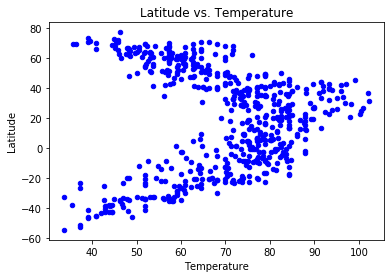

In [46]:

weather_data_df.plot(kind='scatter',x='Max Temp',y='Lat',color='blue')
plt.title('Latitude vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
            
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/output.png')
plt.show() 

## Latitude vs. Humidity Plot

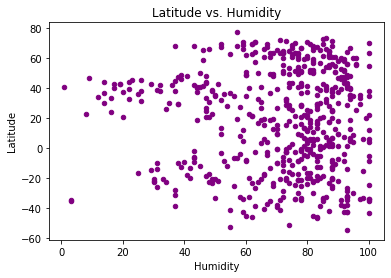

In [45]:
weather_data_df.plot(kind='scatter',x='Humidity',y='Lat',color='purple')
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/humidity.png')
plt.show() 

## Latitude vs. Cloudiness Plot

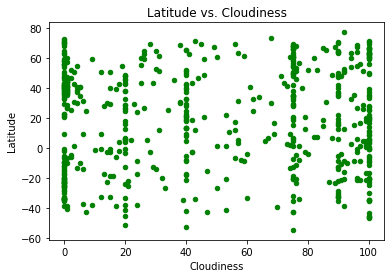

In [44]:
weather_data_df.plot(kind='scatter',x='Cloudiness',y='Lat',color='green')
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/cloudiness.png')
plt.show() 

## Latitude vs. Wind Speed Plot

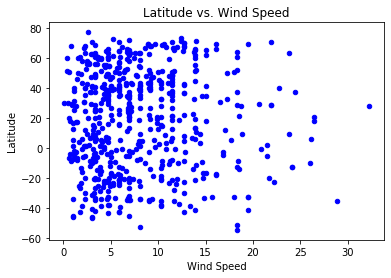

In [43]:
weather_data_df.plot(kind='scatter',x='Wind Speed',y='Lat',color='blue')
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/windspeed.png')
plt.show() 

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0]
northern_df.head()
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,71.60,83,40,11.41,TO,1595887050
2,rikitea,-23.12,-134.97,71.82,74,76,11.14,PF,1595887050
4,hobart,-42.88,147.33,44.60,93,75,5.82,AU,1595886548
5,hermanus,-34.42,19.23,52.00,85,0,1.01,ZA,1595887050
6,grand gaube,-20.01,57.66,66.99,81,0,5.99,MU,1595887050


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

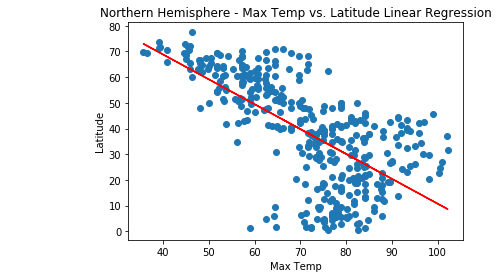

In [42]:
x_values = northern_df['Max Temp']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/north_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

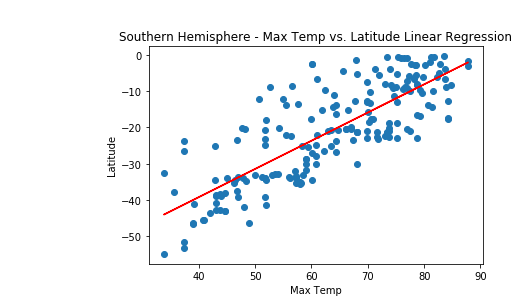

There is very strident results that show the closer to the equator, the hotter it is, for both sides of the equator.
This is, in fact, the clearest proof shown regarding maximum temperatures and positioning on the planet.


In [41]:
x_values = southern_df['Max Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/south_temp.png')
plt.show()
print(f'There is very strident results that show the closer to the equator, the hotter it is, for both sides of the equator.')
print(f'This is, in fact, the clearest proof shown regarding maximum temperatures and positioning on the planet.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

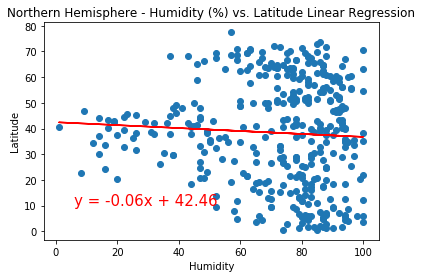

In [40]:
x_values = northern_df['Humidity']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/north_humid.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

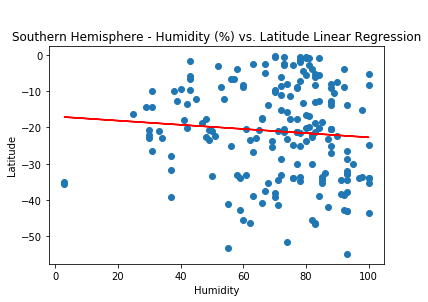

Between the two graphs, there is more humidity at the higher end of the temperature scale.
There does seem to be a slight regression in the humidity for the southern hemisphere, the hotter it gets.
However, the opposite seems true for the northern hemisphere.


In [39]:
x_values = southern_df['Humidity']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/south_humid.png')
plt.show()
print(f'Between the two graphs, there is more humidity at the higher end of the temperature scale.')
print(f'There does seem to be a slight regression in the humidity for the southern hemisphere, the hotter it gets.')
print(f'However, the opposite seems true for the northern hemisphere.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

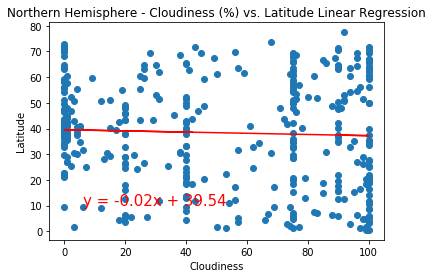

In [35]:
x_values = northern_df['Cloudiness']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/north_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

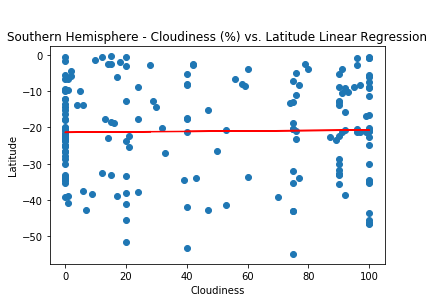

Cloudiness doesn't seems to be affected by whether or not it is in the north or south hemisphere.
The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.


In [36]:
x_values = southern_df['Cloudiness']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/south_cloudy.png')
plt.show()
print(f"Cloudiness doesn't seems to be affected by whether or not it is in the north or south hemisphere.")
print(f"The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

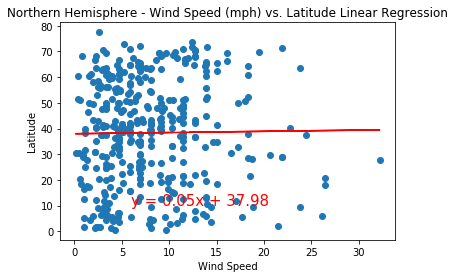

In [37]:
x_values = northern_df['Wind Speed']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/north_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

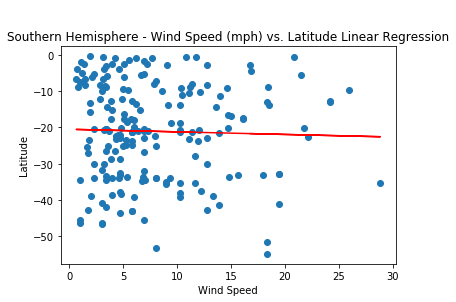

The difference between the Hemispheres, while there is a near flat decrease in wind speed north of the equator, there is a more dramatic increase south of the equator. 
There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.


In [38]:
x_values = southern_df['Wind Speed']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('C:/Users/xtrad/Desktop/TheBoot/Web-Design-Challenge/WebVisualizations/Resources/south_wind.png')
plt.show()
print(f"The difference between the Hemispheres, while there is a near flat decrease in wind speed north of the equator, there is a more dramatic increase south of the equator. ")
print(f'There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.')